### Plot SVM Classifier in the Iris Dataset

In [1]:
# Display Setting
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator)
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [3]:
iris = datasets.load_iris()
x = iris.data[:, :2]
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)

print(x[:10]) # Print sample

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]


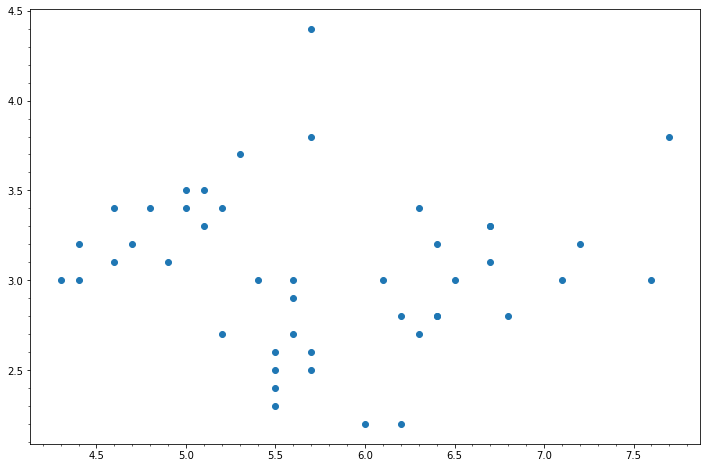

In [4]:
test_x0, test_x1 = x_test[:, 0], x_test[:, 1]
step = 0.1

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
ax.scatter(test_x0, test_x1)
ax.xaxis.set_minor_locator(MultipleLocator(step))
ax.yaxis.set_minor_locator(MultipleLocator(step))

plt.show()

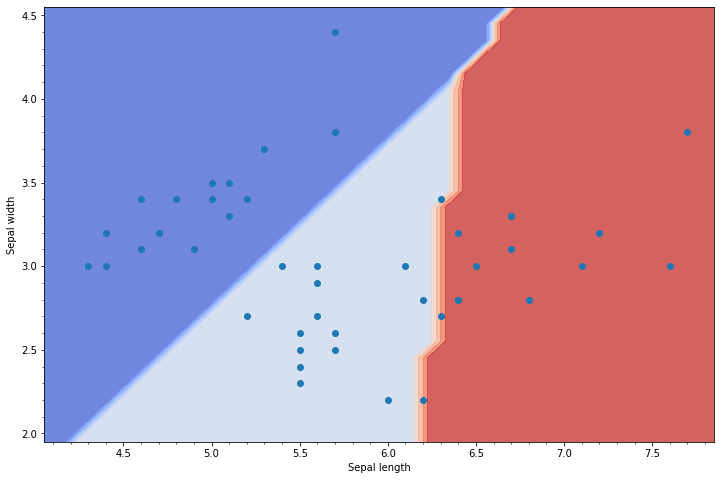

In [5]:
model_svm = SVC(kernel='linear')
clf = model_svm.fit(x_train, y_train)

# Meshgrid
x_min, x_max = test_x0.min() - 0.25, test_x0.max() + 0.25
y_min, y_max = test_x1.min() - 0.25, test_x1.max() + 0.25
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
fig2, ax2 = plt.subplots()
fig2.set_size_inches(12, 8)
ax2.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax2.scatter(test_x0, test_x1)
ax2.set_xlabel('Sepal length')
ax2.set_ylabel('Sepal width')
ax2.set_xlim(xx.min(), xx.max())
ax2.set_ylim(yy.min(), yy.max())
ax2.xaxis.set_minor_locator(MultipleLocator(step))
ax2.yaxis.set_minor_locator(MultipleLocator(step))

plt.show()

#### References

https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html<br/>
https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html